In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# 입력 자동화
inputs = [
    {
        "n_m": [10, 10],
        "gh": [
            [1,0,1,1,1,0,1,1,1,1],
            [1,1,1,0,0,1,1,1,0,1],
            [0,0,1,0,1,1,0,0,1,1],
            [1,1,1,0,1,0,0,1,1,0],
            [1,1,0,0,1,0,1,1,0,0],
            [0,1,1,1,1,1,0,1,1,0],
            [0,1,0,0,0,1,0,0,1,1],
            [0,1,1,1,0,1,0,1,1,1],
            [0,1,0,1,1,1,0,1,0,0],
            [0,1,1,1,0,0,0,1,1,1]
        ]
    }
]

# 상하좌우 이동 표시
dx = [1, -1, 0, 0]
dy = [0, 0, 1, -1]

In [2]:
import heapq

def dijkstra(gh, start, end):
    n, m = len(gh), len(gh[0])
    distances = [[float('inf')] * m for _ in range(n)]
    distances[start[0]][start[1]] = 1
    queue = [(1, start)]
    prev = [[None] * m for _ in range(n)]  # 이전 노드를 저장하는 2차원 배열

    dx = [-1, 1, 0, 0]
    dy = [0, 0, -1, 1]

    while queue:
        current_distance, (x, y) = heapq.heappop(queue)

        if (x, y) == end:
            path = []
            while end is not None:
                path.append(end)
                end = prev[end[0]][end[1]]
            path.reverse()
            return current_distance, path

        for i in range(4):
            nx, ny = x + dx[i], y + dy[i]

            if 0 <= nx < n and 0 <= ny < m and gh[nx][ny] == 1:
                next_distance = current_distance + 1

                if next_distance < distances[nx][ny]:
                    distances[nx][ny] = next_distance
                    prev[nx][ny] = (x, y)
                    heapq.heappush(queue, (next_distance, (nx, ny)))

    return -1, []  # 경로가 없는 경우

In [3]:
def plot_path(maze, path, title, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.set_title(title)
    ax.imshow(maze, cmap='Greys', interpolation='none')
    xs, ys = zip(*path)  # 경로의 x, y 좌표를 분리
    ax.plot(ys, xs, 'bo-')  # 경로를 파란색 선으로 표시

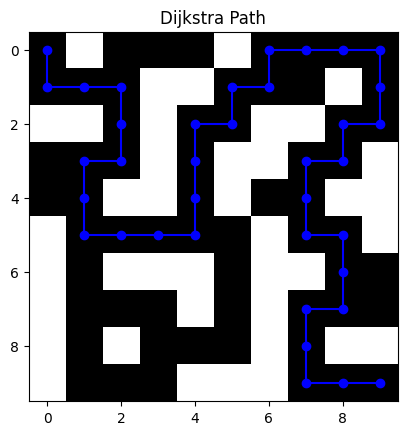

In [4]:
# 다익스트라 알고리즘 실행
for input in inputs:
    n, m = input["n_m"]
    gh = input["gh"]
    start = (0, 0)
    end = (n-1, m-1)
    _, path = dijkstra(gh, start, end)

    # 경로 시각화
    plot_path(np.array(gh), path, "Dijkstra Path")
    plt.show()